In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from time import time
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("../Dataset/weatherAUS_cleaned.csv")

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,7.345179,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,10.498718,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,8.940825,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,11.276425,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,3.806472,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,10.234449,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,11.231068,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,11.867747,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,12.026351,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [4]:
df.drop(['Date', 'Location', 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'Evaporation', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

C:\Users\jonua\AppData\Local\Temp\ipykernel_22404\3915609763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MinTemp'], ax=ax[0, 0])
C:\Users\jonua\AppData\Local\Temp\ipykernel_22404\3915609763.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MaxTemp'], ax=ax[0, 1])
C:\Users\jonua

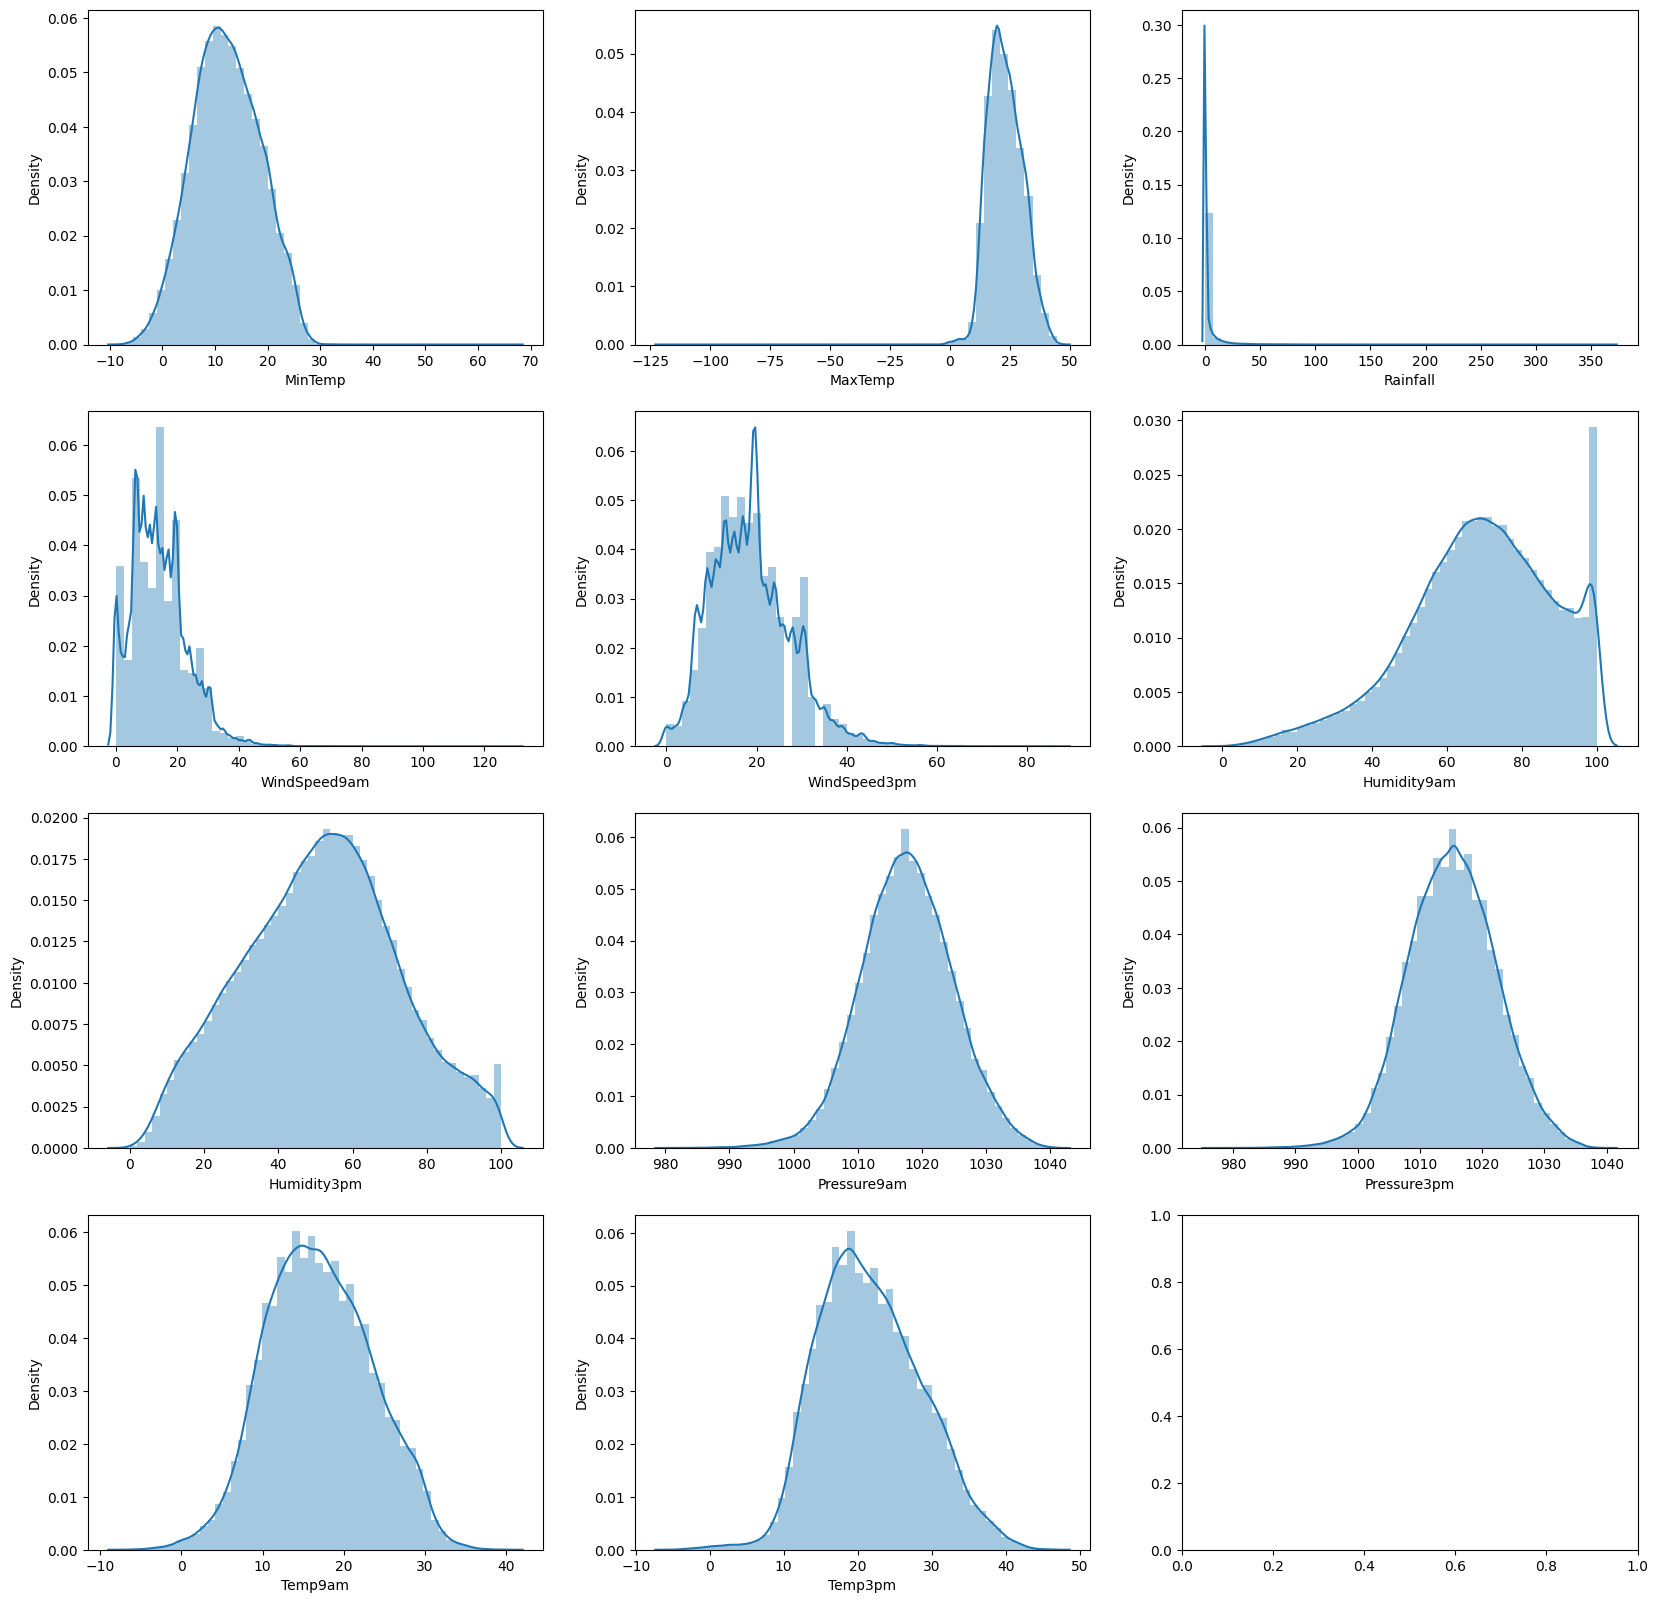

In [5]:
# Plotting the distribution of the features

fig, ax = plt.subplots(4, 3, figsize=(20, 20))
sns.distplot(df['MinTemp'], ax=ax[0, 0])
sns.distplot(df['MaxTemp'], ax=ax[0, 1])
sns.distplot(df['Rainfall'], ax=ax[0, 2])
sns.distplot(df['WindSpeed9am'], ax=ax[1, 0])
sns.distplot(df['WindSpeed3pm'], ax=ax[1, 1])
sns.distplot(df['Humidity9am'], ax=ax[1, 2])
sns.distplot(df['Humidity3pm'], ax=ax[2, 0])
sns.distplot(df['Pressure9am'], ax=ax[2, 1])
sns.distplot(df['Pressure3pm'], ax=ax[2, 2])
sns.distplot(df['Temp9am'], ax=ax[3, 0])
sns.distplot(df['Temp3pm'], ax=ax[3, 1])
# sns.distplot(df['RainToday'], ax=ax[3, 2])
plt.show()

In [6]:
y_rain_today = df['RainToday']
df.drop(['RainToday'], axis=1, inplace=True)

In [7]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [8]:
df

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,7.345179,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,7.4,25.1,0.0,10.498718,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12.9,25.7,0.0,8.940825,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,9.2,28.0,0.0,11.276425,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,0
4,17.5,32.3,1.0,3.806472,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,10.234449,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,0
142189,2.8,23.4,0.0,11.231068,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0
142190,3.6,25.3,0.0,11.867747,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0
142191,5.4,26.9,0.0,12.026351,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0


In [9]:
df.isna().sum()

MinTemp            197
MaxTemp             88
Rainfall           123
Sunshine           171
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            486
Temp3pm            522
RISK_MM              0
RainTomorrow         0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,7.345179,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,7.4,25.1,0.0,10.498718,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12.9,25.7,0.0,8.940825,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,9.2,28.0,0.0,11.276425,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,0
4,17.5,32.3,1.0,3.806472,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,10.234449,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,0
142189,2.8,23.4,0.0,11.231068,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0
142190,3.6,25.3,0.0,11.867747,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0
142191,5.4,26.9,0.0,12.026351,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0


In [12]:
df = shuffle(df)

In [13]:
# Dividing the dataset into training, validation and testing sets

X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [14]:
# Training the model of Random Forest Classifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
rfc_pred_val = rfc.predict(X_val)


<AxesSubplot:>

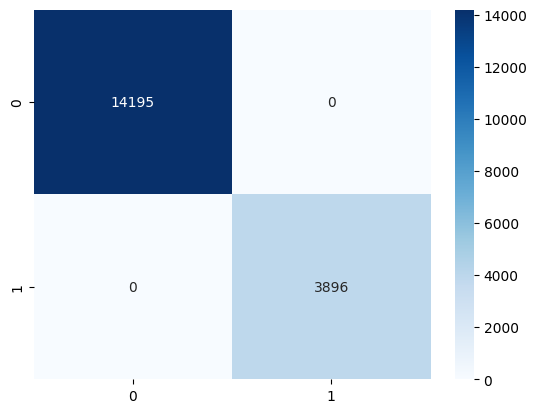

In [15]:
# Heatmap of the confusion matrix

cm_rfc = confusion_matrix(y_val, rfc_pred_val)
sns.heatmap(cm_rfc, annot=True, cmap='Blues', fmt='d')

In [16]:
# Classification report of the model

print(classification_report(y_val, rfc_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14195
           1       1.00      1.00      1.00      3896

    accuracy                           1.00     18091
   macro avg       1.00      1.00      1.00     18091
weighted avg       1.00      1.00      1.00     18091



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14195
           1       1.00      1.00      1.00      3896

    accuracy                           1.00     18091
   macro avg       1.00      1.00      1.00     18091
weighted avg       1.00      1.00      1.00     18091



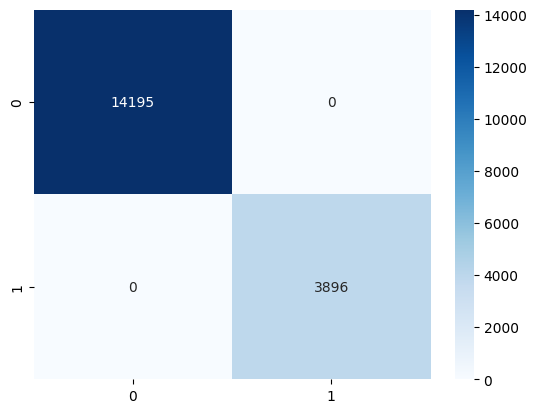

In [17]:
# Training the model of XGBoost Classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred_val = xgb.predict(X_val)

# Heatmap of the confusion matrix

cm_xgb = confusion_matrix(y_val, xgb_pred_val)
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='d')

# Classification report of the model

print(classification_report(y_val, xgb_pred_val))

In [18]:
# Training the model of Support Vector Classifier

svc = SVC(probability=True)
svc.fit(X_train, y_train)
svc_pred_val = svc.predict(X_val)

# Heatmap of the confusion matrix

cm_svc = confusion_matrix(y_val, svc_pred_val)
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='d')

# Classification report of the model

print(classification_report(y_val, svc_pred_val))

c:\Users\jonua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14076
           1       0.99      0.99      0.99      4015

    accuracy                           1.00     18091
   macro avg       0.99      0.99      0.99     18091
weighted avg       1.00      1.00      1.00     18091



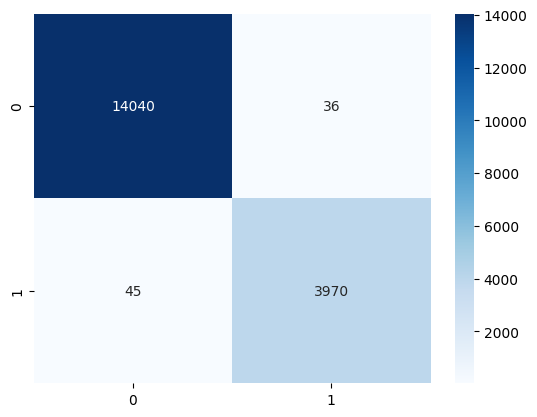

In [ ]:
# Training the model of Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg_pred_val = log_reg.predict(X_val)

# Heatmap of the confusion matrix

cm_log_reg = confusion_matrix(y_val, log_reg_pred_val)
sns.heatmap(cm_log_reg, annot=True, cmap='Blues', fmt='d')

# Classification report of the model

print(classification_report(y_val, log_reg_pred_val))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     14076
           1       0.87      0.63      0.73      4015

    accuracy                           0.90     18091
   macro avg       0.88      0.80      0.83     18091
weighted avg       0.89      0.90      0.89     18091



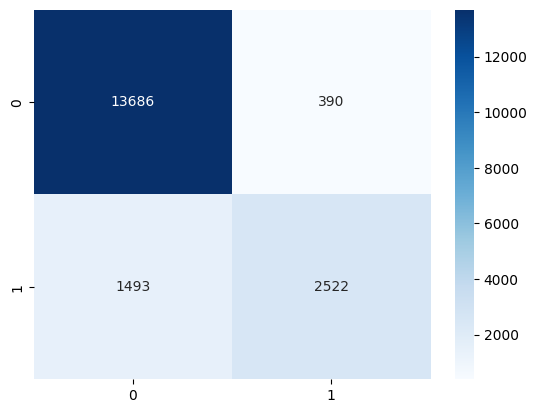

In [ ]:
# Training the model of K-Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

knn_pred_val = knn.predict(X_val)

# Heatmap of the confusion matrix

cm_knn = confusion_matrix(y_val, knn_pred_val)
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d')

# Classification report of the model

print(classification_report(y_val, knn_pred_val))

In [ ]:
# Testing all the models on the testing set

rfc_pred_test = rfc.predict(X_test)
xgb_pred_test = xgb.predict(X_test)
svc_pred_test = svc.predict(X_test)
log_reg_pred_test = log_reg.predict(X_test)
knn_pred_test = knn.predict(X_test)

# Classification report of the models

print("Random Forest Classifier")
print(classification_report(y_test, rfc_pred_test))

print("XGBoost Classifier")
print(classification_report(y_test, xgb_pred_test))

print("Support Vector Classifier")
print(classification_report(y_test, svc_pred_test))

print("Logistic Regression")
print(classification_report(y_test, log_reg_pred_test))

print("K-Nearest Neighbors Classifier")
print(classification_report(y_test, knn_pred_test))

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14047
           1       1.00      1.00      1.00      4044

    accuracy                           1.00     18091
   macro avg       1.00      1.00      1.00     18091
weighted avg       1.00      1.00      1.00     18091

XGBoost Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14047
           1       1.00      1.00      1.00      4044

    accuracy                           1.00     18091
   macro avg       1.00      1.00      1.00     18091
weighted avg       1.00      1.00      1.00     18091

Support Vector Classifier
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     14047
           1       0.99      0.44      0.61      4044

    accuracy                           0.87     18091
   macro avg       0.93      0.72      0.77     18091
weig

In [ ]:
# Storing the accuracy scores, precision scores, recall scores and f1 scores of all the models of validation set in a dataframe

models = ['Random Forest Classifier', 'XGBoost Classifier', 'Support Vector Classifier', 'Logistic Regression', 'K-Nearest Neighbors Classifier']
accuracy_scores = [accuracy_score(y_val, rfc_pred_val), accuracy_score(y_val, xgb_pred_val), accuracy_score(y_val, svc_pred_val), accuracy_score(y_val, log_reg_pred_val), accuracy_score(y_val, knn_pred_val)]
precision_scores = [precision_score(y_val, rfc_pred_val), precision_score(y_val, xgb_pred_val), precision_score(y_val, svc_pred_val), precision_score(y_val, log_reg_pred_val), precision_score(y_val, knn_pred_val)]
recall_scores = [recall_score(y_val, rfc_pred_val), recall_score(y_val, xgb_pred_val), recall_score(y_val, svc_pred_val), recall_score(y_val, log_reg_pred_val), recall_score(y_val, knn_pred_val)]
f1_scores = [f1_score(y_val, rfc_pred_val), f1_score(y_val, xgb_pred_val), f1_score(y_val, svc_pred_val), f1_score(y_val, log_reg_pred_val), f1_score(y_val, knn_pred_val)]

df_scores_val = pd.DataFrame({'Model': models, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores})
df_scores_val


,Model,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
1,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000
2,Support Vector Classifier,0.869880,0.986526,0.419427,0.588605
3,Logistic Regression,0.995523,0.991013,0.988792,0.989902
4,K-Nearest Neighbors Classifier,0.895915,0.866071,0.628144,0.728165


In [ ]:
# Storing the accuracy scores, precision scores, recall scores and f1 scores of all the models of testing set in a dataframe

models = ['Random Forest Classifier', 'XGBoost Classifier', 'Support Vector Classifier', 'Logistic Regression', 'K-Nearest Neighbors Classifier']
accuracy_scores = [accuracy_score(y_test, rfc_pred_test), accuracy_score(y_test, xgb_pred_test), accuracy_score(y_test, svc_pred_test), accuracy_score(y_test, log_reg_pred_test), accuracy_score(y_test, knn_pred_test)]
precision_scores = [precision_score(y_test, rfc_pred_test), precision_score(y_test, xgb_pred_test), precision_score(y_test, svc_pred_test), precision_score(y_test, log_reg_pred_test), precision_score(y_test, knn_pred_test)]
recall_scores = [recall_score(y_test, rfc_pred_test), recall_score(y_test, xgb_pred_test), recall_score(y_test, svc_pred_test), recall_score(y_test, log_reg_pred_test), recall_score(y_test, knn_pred_test)]
f1_scores = [f1_score(y_test, rfc_pred_test), f1_score(y_test, xgb_pred_test), f1_score(y_test, svc_pred_test), f1_score(y_test, log_reg_pred_test), f1_score(y_test, knn_pred_test)]

df_scores_test = pd.DataFrame({'Model': models, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores})
df_scores_test

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
1,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000
2,Support Vector Classifier,0.874910,0.991717,0.444115,0.613493
3,Logistic Regression,0.993975,0.988092,0.984916,0.986502
4,K-Nearest Neighbors Classifier,0.892875,0.857434,0.624629,0.722747


In [ ]:
# Fine Tuning Logistic Regression Model using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(log_reg, param_grid, refit=True)
grid.fit(X_train, y_train)


# Best parameters for the model

grid.best_params_


c:\Users\jonua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jonua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
# Predicting the values of the testing set using the fine tuned model

log_reg_pred_test = grid.predict(X_test)

# Classification report of the model

print(classification_report(y_test, log_reg_pred_test))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14047
           1       0.98      0.96      0.97      4044

    accuracy                           0.99     18091
   macro avg       0.98      0.98      0.98     18091
weighted avg       0.99      0.99      0.99     18091



In [ ]:
# Predicting the values of the validation set using the fine tuned model

log_reg_pred_val = grid.predict(X_val)

# Classification report of the model

print(classification_report(y_val, log_reg_pred_val))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14076
           1       0.97      0.96      0.97      4015

    accuracy                           0.99     18091
   macro avg       0.98      0.98      0.98     18091
weighted avg       0.99      0.99      0.99     18091



In [ ]:
# Training the model of LightGBM Classifier

model_lgb = lgb.LGBMClassifier()

model_lgb.fit(X_train, y_train)
lgb_pred_val = model_lgb.predict(X_val)

<AxesSubplot:>

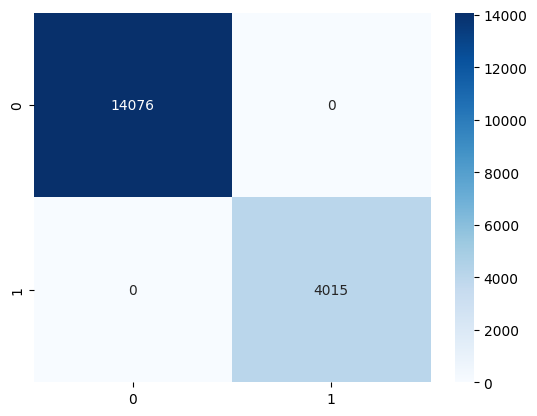

In [ ]:
# Heatmap of the confusion matrix

cm_lgb = confusion_matrix(y_val, lgb_pred_val)
sns.heatmap(cm_lgb, annot=True, cmap='Blues', fmt='d')

In [ ]:
# Classification report of the model

print(classification_report(y_val, lgb_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14076
           1       1.00      1.00      1.00      4015

    accuracy                           1.00     18091
   macro avg       1.00      1.00      1.00     18091
weighted avg       1.00      1.00      1.00     18091



In [ ]:
# Predicting the values of the testing set using the lightgbm model

lgb_pred_test = model_lgb.predict(X_test)

In [ ]:
# Appending the accuracy scores, precision scores, recall scores and f1 scores of light gb model of validation set in the dataframe scores_val

models.append('LightGBM Classifier')
accuracy_scores.append(accuracy_score(y_val, lgb_pred_val))
precision_scores.append(precision_score(y_val, lgb_pred_val))
recall_scores.append(recall_score(y_val, lgb_pred_val))
f1_scores.append(f1_score(y_val, lgb_pred_val))

df_scores_val = pd.DataFrame({'Model': models, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores})
df_scores_val

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
1,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000
2,Support Vector Classifier,0.874910,0.991717,0.444115,0.613493
3,Logistic Regression,0.993975,0.988092,0.984916,0.986502
4,K-Nearest Neighbors Classifier,0.892875,0.857434,0.624629,0.722747
5,LightGBM Classifier,1.000000,1.000000,1.000000,1.000000


In [ ]:
models = ['Random Forest Classifier', 'XGBoost Classifier', 'Support Vector Classifier', 'Logistic Regression', 'K-Nearest Neighbors Classifier']
accuracy_scores = [accuracy_score(y_test, rfc_pred_test), accuracy_score(y_test, xgb_pred_test), accuracy_score(y_test, svc_pred_test), accuracy_score(y_test, log_reg_pred_test), accuracy_score(y_test, knn_pred_test)]
precision_scores = [precision_score(y_test, rfc_pred_test), precision_score(y_test, xgb_pred_test), precision_score(y_test, svc_pred_test), precision_score(y_test, log_reg_pred_test), precision_score(y_test, knn_pred_test)]
recall_scores = [recall_score(y_test, rfc_pred_test), recall_score(y_test, xgb_pred_test), recall_score(y_test, svc_pred_test), recall_score(y_test, log_reg_pred_test), recall_score(y_test, knn_pred_test)]
f1_scores = [f1_score(y_test, rfc_pred_test), f1_score(y_test, xgb_pred_test), f1_score(y_test, svc_pred_test), f1_score(y_test, log_reg_pred_test), f1_score(y_test, knn_pred_test)]

In [ ]:
# Appending the accuracy scores, precision scores, recall scores and f1 scores of light gb model of testing set in the dataframe scores_test

models.append('LightGBM Classifier')
accuracy_scores.append(accuracy_score(y_test, lgb_pred_test))
precision_scores.append(precision_score(y_test, lgb_pred_test))
recall_scores.append(recall_score(y_test, lgb_pred_test))
f1_scores.append(f1_score(y_test, lgb_pred_test))

df_scores_test = pd.DataFrame({'Model': models, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores})
df_scores_test

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
1,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000
2,Support Vector Classifier,0.874910,0.991717,0.444115,0.613493
3,Logistic Regression,0.986292,0.978327,0.959941,0.969046
4,K-Nearest Neighbors Classifier,0.892875,0.857434,0.624629,0.722747
5,LightGBM Classifier,1.000000,1.000000,1.000000,1.000000


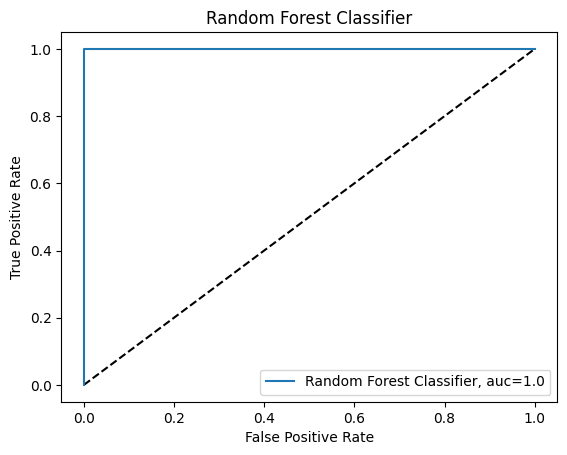

In [ ]:
# PLotting the Roc- Auc Curve of all the models

# Random Forest Classifier

y_pred_proba_rfc = rfc.predict_proba(X_test)[::, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test,  y_pred_proba_rfc)
auc_rfc = roc_auc_score(y_test, y_pred_proba_rfc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rfc,tpr_rfc,label="Random Forest Classifier, auc="+str(auc_rfc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

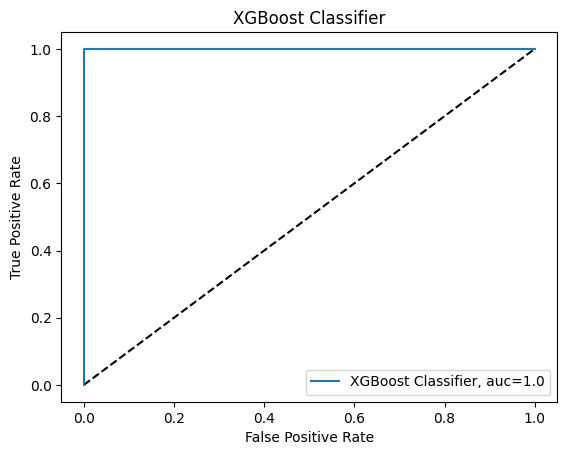

In [ ]:
# XGBoost Classifier

y_pred_proba_xgb = xgb.predict_proba(X_test)[::, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test,  y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost Classifier, auc="+str(auc_xgb))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier')
plt.show()

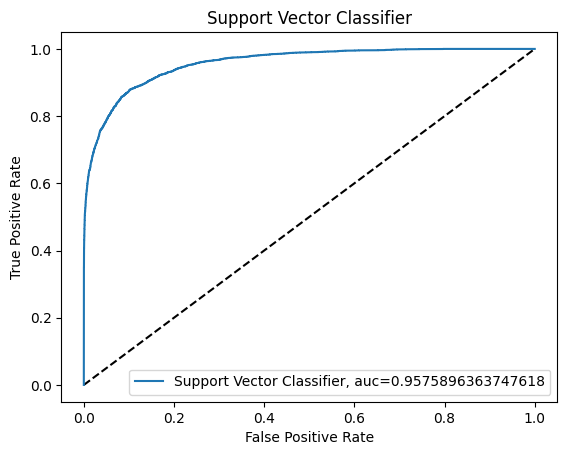

In [ ]:
# Support Vector Classifier

y_pred_proba_svc = svc.predict_proba(X_test)[::, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test,  y_pred_proba_svc)
auc_svc = roc_auc_score(y_test, y_pred_proba_svc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svc,tpr_svc,label="Support Vector Classifier, auc="+str(auc_svc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Classifier')
plt.show()

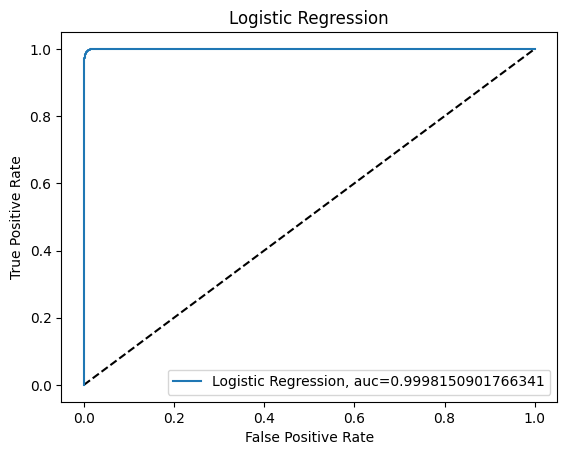

In [ ]:
# Logistic Regression

y_pred_proba_log_reg = log_reg.predict_proba(X_test)[::, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test,  y_pred_proba_log_reg)
auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log_reg,tpr_log_reg,label="Logistic Regression, auc="+str(auc_log_reg))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

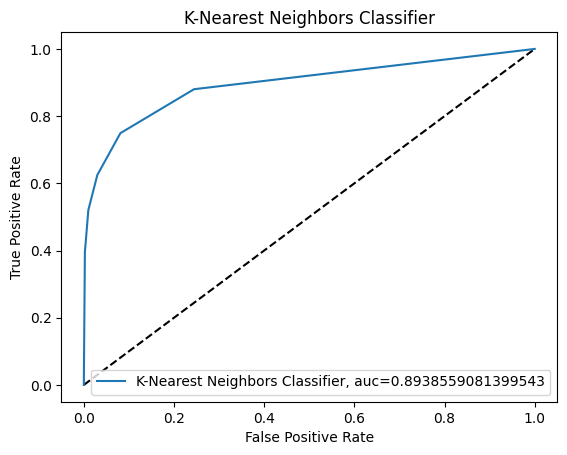

In [ ]:
# K-Nearest Neighbors Classifier

y_pred_proba_knn = knn.predict_proba(X_test)[::, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test,  y_pred_proba_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn,tpr_knn,label="K-Nearest Neighbors Classifier, auc="+str(auc_knn))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors Classifier')
plt.show()

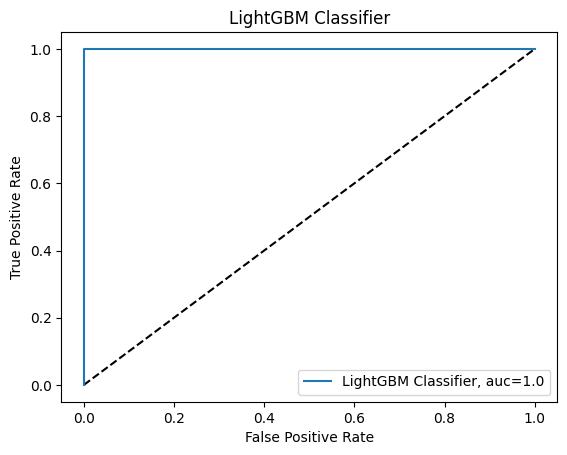

In [ ]:
# LightGBM Classifier

y_pred_proba_lgb = model_lgb.predict_proba(X_test)[::, 1]
fpr_lgb, tpr_lgb, _ = roc_curve(y_test,  y_pred_proba_lgb)
auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lgb,tpr_lgb,label="LightGBM Classifier, auc="+str(auc_lgb))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM Classifier')
plt.show()

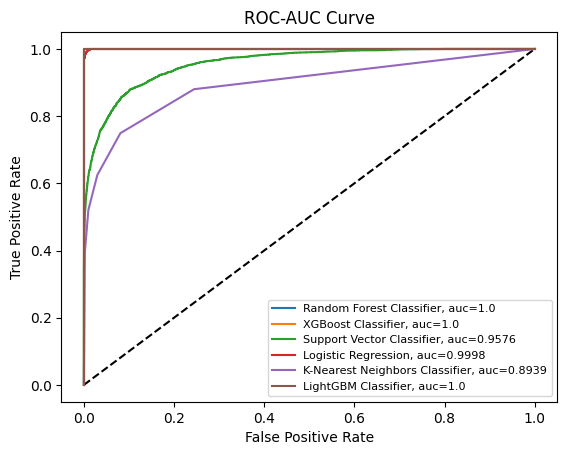

In [ ]:
# Plotting the Roc- Auc Curve of all the models in a single graph

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rfc,tpr_rfc,label="Random Forest Classifier, auc="+str(round(auc_rfc, 4)))
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost Classifier, auc="+str(round(auc_xgb, 4)))
plt.plot(fpr_svc,tpr_svc,label="Support Vector Classifier, auc="+str(round(auc_svc, 4)))
plt.plot(fpr_log_reg,tpr_log_reg,label="Logistic Regression, auc="+str(round(auc_log_reg, 4)))
plt.plot(fpr_knn,tpr_knn,label="K-Nearest Neighbors Classifier, auc="+str(round(auc_knn, 4)))
plt.plot(fpr_lgb,tpr_lgb,label="LightGBM Classifier, auc="+str(round(auc_lgb, 4)))
plt.legend(loc=4, prop={'size': 8})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.show()